# Task 1

In [333]:
import pandas as pd

In [274]:
beans = pd.read_excel("Dry_Bean_Dataset.xlsx")

In [275]:
beans.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [276]:
beans['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

In [278]:
X4 = beans.drop(['Class'], axis=1)

y4 = beans['Class']

In [ ]:
from sklearn.model_selection import train_test_split

X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size = 0.2, random_state = 0)

In [281]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train4, y_train4)  

pred = dt.predict(X_test4)

train_acc = dt.score(X_train4, y_train4) 
test_acc = accuracy_score(y_test4, pred) 

print('Training Accuracy: ', train_acc * 100)
print('Testing Accuracy: ', test_acc * 100)

#with pruning

dt = DecisionTreeClassifier(criterion='entropy', ccp_alpha=0.015)
dt.fit(X_train4, y_train4)  

pred = dt.predict(X_test4)

train_acc = dt.score(X_train4, y_train4) 
test_acc = accuracy_score(y_test4, pred) 

print('\nTraining Accuracy: ', train_acc * 100)
print('Testing Accuracy: ', test_acc * 100)

Training Accuracy:  100.0
Testing Accuracy:  90.41498347410943

Training Accuracy:  88.14290962527554
Testing Accuracy:  87.62394417921409


In [282]:
dt = DecisionTreeClassifier(criterion='gini')
dt.fit(X_train4, y_train4)  

pred = dt.predict(X_test4)

train_acc = dt.score(X_train4, y_train4) 
test_acc = accuracy_score(y_test4, pred) 

print('Training Accuracy: ', train_acc * 100)
print('Testing Accuracy: ', test_acc * 100)

#with pruning
dt = DecisionTreeClassifier(criterion='gini', ccp_alpha=0.015)
dt.fit(X_train4, y_train4)  

pred = dt.predict(X_test4)

train_acc = dt.score(X_train4, y_train4) 
test_acc = accuracy_score(y_test4, pred) 

print('\nTraining Accuracy: ', train_acc * 100)
print('Testing Accuracy: ', test_acc * 100)

Training Accuracy:  100.0
Testing Accuracy:  89.53360264414249

Training Accuracy:  87.7939015429831
Testing Accuracy:  88.21153139919207


In [305]:
adult = pd.read_csv("adult.csv")
adult.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [306]:
from sklearn.preprocessing import OrdinalEncoder

In [307]:
adult = adult.drop('age', axis=1)

In [309]:
columns = ['workclass', 'education', 'marital.status', 'occupation','relationship','race','sex','native.country']

encoder = OrdinalEncoder()

In [310]:
adult[columns] = encoder.fit_transform(adult[columns])

In [316]:
adult['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [312]:
adult.head()

,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,0.0,77053,11.0,9,6.0,0.0,1.0,4.0,0.0,0,4356,40,39.0,<=50K
1,4.0,132870,11.0,9,6.0,4.0,1.0,4.0,0.0,0,4356,18,39.0,<=50K
2,0.0,186061,15.0,10,6.0,0.0,4.0,2.0,0.0,0,4356,40,39.0,<=50K
3,4.0,140359,5.0,4,0.0,7.0,4.0,4.0,0.0,0,3900,40,39.0,<=50K
4,4.0,264663,15.0,10,5.0,10.0,3.0,4.0,0.0,0,3900,40,39.0,<=50K


In [313]:
X5 = adult.drop(['income'], axis=1)

y5 = adult['income']

In [314]:
from sklearn.model_selection import train_test_split

X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size = 0.2, random_state = 0)

In [315]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train5, y_train5)  

pred = dt.predict(X_test5)

train_acc = dt.score(X_train5, y_train5) 
test_acc = accuracy_score(y_test5, pred) 

print('Training Accuracy: ', train_acc * 100)
print('Testing Accuracy: ', test_acc * 100)

#with pruning

dt = DecisionTreeClassifier(criterion='entropy', ccp_alpha=0.015)
dt.fit(X_train5, y_train5)  

pred = dt.predict(X_test5)

train_acc = dt.score(X_train5, y_train5) 
test_acc = accuracy_score(y_test5, pred) 

print('\nTraining Accuracy: ', train_acc * 100)
print('Testing Accuracy: ', test_acc * 100)

Training Accuracy:  99.98464373464373
Testing Accuracy:  80.9765085214187

Training Accuracy:  83.9411855036855
Testing Accuracy:  84.13941348073085


In [317]:
dt = DecisionTreeClassifier(criterion='gini')
dt.fit(X_train5, y_train5)  

pred = dt.predict(X_test5)

train_acc = dt.score(X_train5, y_train5) 
test_acc = accuracy_score(y_test5, pred) 

print('Training Accuracy: ', train_acc * 100)
print('Testing Accuracy: ', test_acc * 100)

#with pruning
dt = DecisionTreeClassifier(criterion='gini', ccp_alpha=0.015)
dt.fit(X_train5, y_train5)  

pred = dt.predict(X_test5)

train_acc = dt.score(X_train5, y_train5) 
test_acc = accuracy_score(y_test5, pred) 

print('\nTraining Accuracy: ', train_acc * 100)
print('Testing Accuracy: ', test_acc * 100)

Training Accuracy:  99.98464373464373
Testing Accuracy:  80.77690772301551

Training Accuracy:  82.60902948402948
Testing Accuracy:  82.68079226163059


<Axes: >

C:\Users\mujta\anaconda3\Lib\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\mujta\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


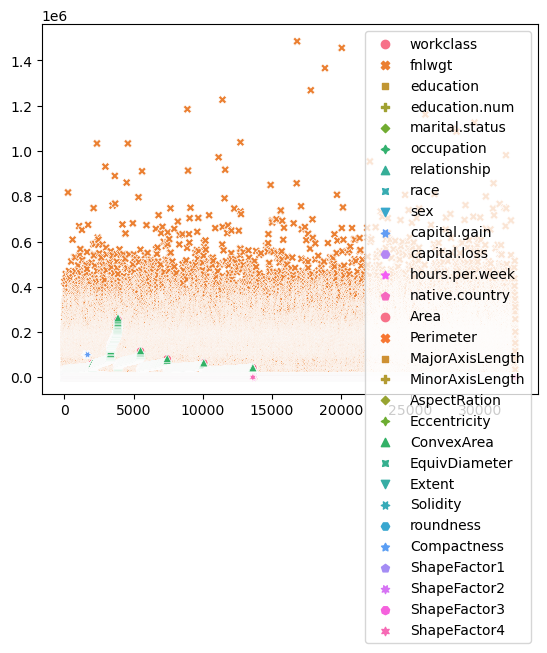

In [334]:
sns.scatterplot(data=adult)
sns.scatterplot(data=beans)

<Axes: >

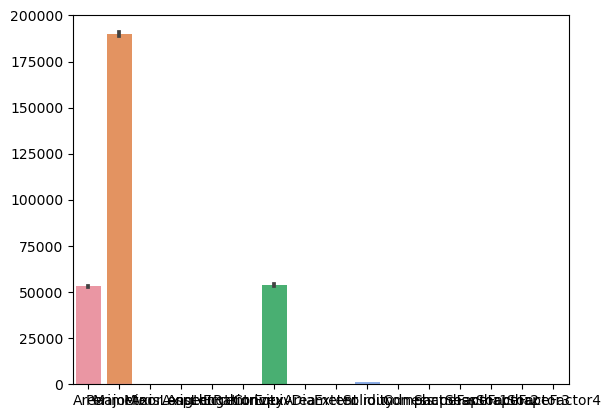

In [337]:
sns.barplot(data=adult)
sns.barplot(data=beans)

<Axes: >

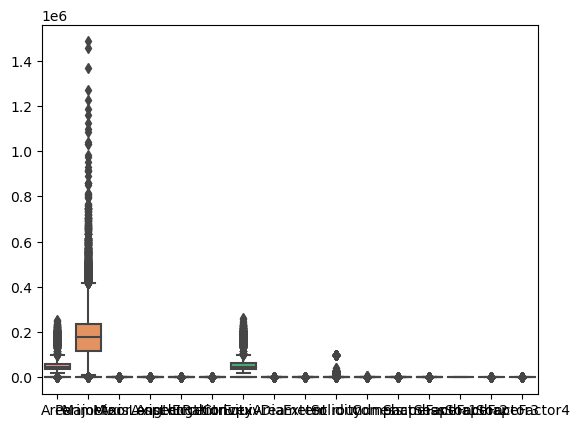

In [338]:
sns.boxplot(data=adult)
sns.boxplot(data=beans)

<Axes: ylabel='Density'>

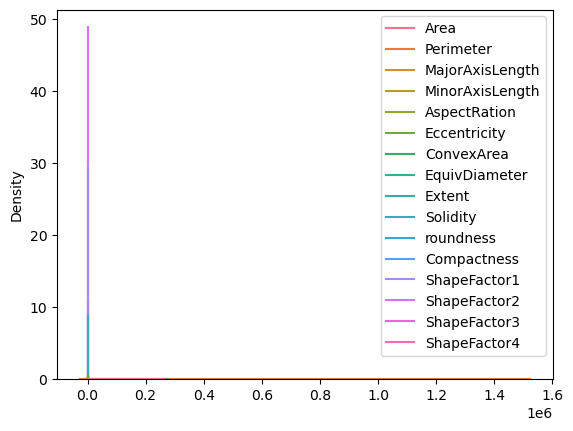

In [339]:
sns.kdeplot(data=adult)
sns.kdeplot(data=beans)

<Axes: >

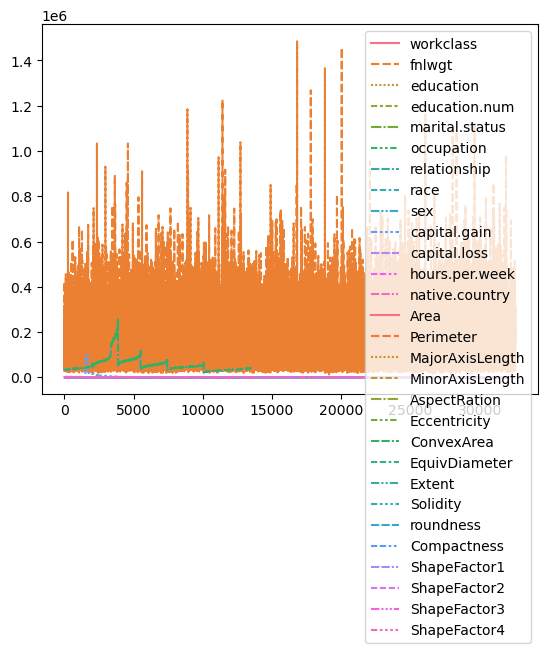

In [340]:
sns.lineplot(data=adult)
sns.lineplot(data=beans)

<Axes: ylabel='count'>

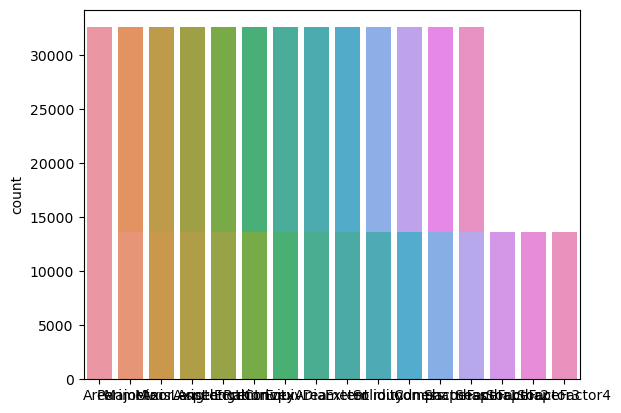

In [344]:
sns.countplot(data=adult)
sns.countplot(data=beans)

# Task 2

2: Find out the root node of the decision tree from scratch on the below dataset (Age,
Job_Status , Own_House , Credit Rating) using the ID3 algorithm. You can create this dataset
in an Excelfile. (IG should be calculated for all the input Attributes).

In [3]:
df = pd.read_csv("data.csv")

In [4]:
df.head()

,Unnamed: 0,ID,AGE,JOB_STATUS,OWNS_HOUSE,CREDIT_RATING,CLASS (Yes or No)
0,0,1,Young,False,False,Fair,No
1,1,2,Young,False,False,Good,No
2,2,3,Young,True,False,Good,Yes
3,3,4,Young,True,True,Fair,Yes
4,4,5,Young,False,False,Fair,No


In [5]:
df = df.drop(['Unnamed: 0','ID'], axis =1)

In [6]:
df

,AGE,JOB_STATUS,OWNS_HOUSE,CREDIT_RATING,CLASS (Yes or No)
0,Young,False,False,Fair,No
1,Young,False,False,Good,No
2,Young,True,False,Good,Yes
3,Young,True,True,Fair,Yes
4,Young,False,False,Fair,No
5,Middle,False,False,Fair,No
6,Middle,False,True,Good,Yes
7,Middle,True,True,Good,Yes
8,Middle,False,True,Excellent,Yes
9,Middle,False,True,Excellent,Yes


In [7]:
convert = {
    'AGE' : {'Young':0 , 'Middle': 1, 'Old': 2},
    'JOB_STATUS' : {False:0, True :1},
    'OWNS_HOUSE' : {False:0, True :1 },
    'CREDIT_RATING': {'Fair':0, 'Good':1, 'Excellent':2}
}

In [8]:
df = df.replace(convert)

In [9]:
df

,AGE,JOB_STATUS,OWNS_HOUSE,CREDIT_RATING,CLASS (Yes or No)
0,0,0,0,0,No
1,0,0,0,1,No
2,0,1,0,1,Yes
3,0,1,1,0,Yes
4,0,0,0,0,No
5,1,0,0,0,No
6,1,0,1,1,Yes
7,1,1,1,1,Yes
8,1,0,1,2,Yes
9,1,0,1,2,Yes


In [10]:
X = df.drop(['CLASS (Yes or No)'], axis=1)

y = df['CLASS (Yes or No)']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [12]:
X_train.dtypes

AGE              int64
JOB_STATUS       int64
OWNS_HOUSE       int64
CREDIT_RATING    int64
dtype: object

In [13]:
X_train.head()

,AGE,JOB_STATUS,OWNS_HOUSE,CREDIT_RATING
13,2,1,0,2
5,1,0,0,0
8,1,0,1,2
2,0,1,0,1
1,0,0,0,1


In [14]:
X_test.head()

,AGE,JOB_STATUS,OWNS_HOUSE,CREDIT_RATING
9,1,0,1,2
11,2,0,1,1
0,0,0,0,0


In [21]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [22]:
y_pred = model.predict(X_test)

In [23]:
y_pred_train = model.predict(X_train)

y_pred_train

array(['Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes'], dtype=object)

In [24]:
print('Training set score: {:}'.format(model.score(X_train, y_train)))

print('Test set score: {:}'.format(model.score(X_test, y_test)))

Training set score: 1.0
Test set score: 0.6666666666666666


[Text(0.6, 0.8333333333333334, 'x[1] <= 0.5\nentropy = 0.918\nsamples = 12\nvalue = [4, 8]'),
 Text(0.4, 0.5, 'x[2] <= 0.5\nentropy = 0.985\nsamples = 7\nvalue = [4, 3]'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.6, 0.16666666666666666, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.8, 0.5, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.7, 0.6666666666666667, '  False')]

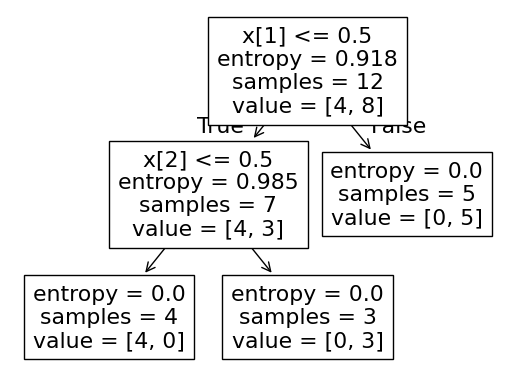

In [25]:
from sklearn import tree

tree.plot_tree(model.fit(X_train, y_train)) 

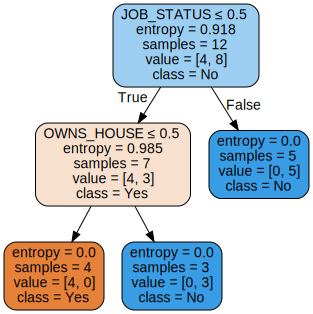

In [26]:
import graphviz 
dot_data = tree.export_graphviz(model, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       1.00      0.50      0.67         2
         Yes       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



# Task 3

In [101]:
df1 = pd.read_csv("cancer patient data sets.csv")

● Perform EDA

In [29]:
df1.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [38]:
df1.shape

(1000, 23)

In [40]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Gender                    1000 non-null   int64 
 1   Air Pollution             1000 non-null   int64 
 2   Alcohol use               1000 non-null   int64 
 3   Dust Allergy              1000 non-null   int64 
 4   OccuPational Hazards      1000 non-null   int64 
 5   Genetic Risk              1000 non-null   int64 
 6   chronic Lung Disease      1000 non-null   int64 
 7   Balanced Diet             1000 non-null   int64 
 8   Obesity                   1000 non-null   int64 
 9   Smoking                   1000 non-null   int64 
 10  Passive Smoker            1000 non-null   int64 
 11  Chest Pain                1000 non-null   int64 
 12  Coughing of Blood         1000 non-null   int64 
 13  Fatigue                   1000 non-null   int64 
 14  Weight Loss              

In [42]:
df1.isnull().sum()

Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [43]:
df1.duplicated().sum()

916

In [30]:
df1.columns

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

● Check whether the dataset is balanced or not (using target variable “Label”)

In [47]:
df1['Level'].value_counts()

High      365
Medium    332
Low       303
Name: Level, dtype: int64

● Check whether there is any empty records, categorical feature, or duplicate records, yes
Then handle this and give a brief explanation why you have chosen this technique in a
text cell or “jupyter/colab”

In [53]:
df1.duplicated().sum()

916

In [49]:
df1.isnull().sum()

Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

● Check the correlation of your dataset and perform feature selection using Pearson
Correlation

In [102]:
df1 = df1.drop(['index','Patient Id','Age'],axis=1)

In [103]:
def correlation(dataset, threshold):
    col_corr = set() 
    corr_matrix = dataset.corr()  

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i] 
                col_corr.add(colname)

    return col_corr


corr_features = correlation(df1, 0.4) 
print(f'Number of correlated features: {len(corr_features)}')

df1 = df1.drop(corr_features, axis=1)

df1.head()

Number of correlated features: 17


C:\Users\mujta\AppData\Local\Temp\ipykernel_15504\775544276.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


,Gender,Air Pollution,Wheezing,Swallowing Difficulty,Snoring,Level
0,1,2,2,3,4,Low
1,1,3,8,6,2,Medium
2,1,4,2,1,2,High
3,1,7,1,4,5,High
4,1,6,1,4,3,High


● Analyze your dataset and think if feature scaling is required or not. If yes then apply any
scaling technique based on your distribution.

In [104]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train)

[[ 1.26722657 -1.40072639  1.6368661   0.14955877  1.37188039]
 [-0.78912487  1.09499992 -0.83761024 -0.30364963  2.04313684]
 [ 1.26722657 -1.40072639  1.6368661   0.14955877  1.37188039]
 ...
 [ 1.26722657 -0.90158113  0.64707556  1.96239238  0.02936747]
 [-0.78912487  1.09499992 -0.83761024 -1.21006643 -0.64188899]
 [-0.78912487  1.09499992 -0.83761024 -1.21006643 -0.64188899]]


In [105]:
df1.head()

,Gender,Air Pollution,Wheezing,Swallowing Difficulty,Snoring,Level
0,1,2,2,3,4,Low
1,1,3,8,6,2,Medium
2,1,4,2,1,2,High
3,1,7,1,4,5,High
4,1,6,1,4,3,High


● Split your dataset in training, testing, and validation. The train split will be 80% and the
test will be 20%. In the validation split your training samples will be 70% and the
validation set will be 30%. Briefly describe why we use a validation set in a text cell.
Declare Random_state=0

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [72]:
X_train, X_validate, y_train, y_validate = train_test_split(X,y,test_size=0.3,random_state=0)

● Apply DT and check model training and testing accuracy.

In [106]:
X = df1.drop(columns=['Level'])
y = df1['Level']

In [107]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [108]:
X_train1.dtypes

Gender                   int64
Air Pollution            int64
Wheezing                 int64
Swallowing Difficulty    int64
Snoring                  int64
dtype: object

In [120]:
model1 = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

model1.fit(X_train1, y_train1)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

In [121]:
y_pred1 = model1.predict(X_test1)

In [122]:
y_pred_train = model1.predict(X_train1)

y_pred_train

array(['Medium', 'High', 'Medium', 'Medium', 'Low', 'Low', 'High', 'High',
       'High', 'Low', 'Medium', 'High', 'Low', 'Low', 'High', 'High',
       'High', 'Medium', 'Medium', 'High', 'Medium', 'High', 'High',
       'Low', 'High', 'High', 'High', 'High', 'Medium', 'High', 'High',
       'High', 'Low', 'High', 'Low', 'Low', 'Medium', 'Medium', 'Medium',
       'High', 'High', 'High', 'Medium', 'High', 'Medium', 'High', 'High',
       'Low', 'Medium', 'Medium', 'Medium', 'High', 'Medium', 'Low',
       'Medium', 'Low', 'Medium', 'High', 'Low', 'High', 'Medium', 'High',
       'High', 'Low', 'High', 'High', 'High', 'Low', 'Medium', 'Low',
       'Medium', 'Low', 'Medium', 'High', 'Low', 'Medium', 'Medium',
       'Low', 'Medium', 'Low', 'Low', 'High', 'High', 'Low', 'High',
       'High', 'Medium', 'High', 'High', 'Low', 'Low', 'Medium', 'Medium',
       'High', 'Medium', 'Low', 'Low', 'High', 'Low', 'Low', 'High',
       'High', 'Low', 'High', 'Low', 'Low', 'Medium', 'High', 'High',

[Text(0.6111111111111112, 0.9166666666666666, 'x[1] <= -0.153\nentropy = 1.583\nsamples = 800\nvalue = [283, 248, 269]'),
 Text(0.3888888888888889, 0.75, 'x[2] <= 0.4\nentropy = 1.202\nsamples = 419\nvalue = [17, 213, 189]'),
 Text(0.5, 0.8333333333333333, 'True  '),
 Text(0.2777777777777778, 0.5833333333333334, 'x[4] <= 1.036\nentropy = 0.961\nsamples = 287\nvalue = [9, 213, 65]'),
 Text(0.2222222222222222, 0.4166666666666667, 'x[1] <= -1.151\nentropy = 0.671\nsamples = 245\nvalue = [9, 213, 23]'),
 Text(0.1111111111111111, 0.25, 'x[2] <= -0.095\nentropy = 0.99\nsamples = 52\nvalue = [0, 29, 23]'),
 Text(0.05555555555555555, 0.08333333333333333, 'entropy = 0.0\nsamples = 29\nvalue = [0, 29, 0]'),
 Text(0.16666666666666666, 0.08333333333333333, 'entropy = 0.0\nsamples = 23\nvalue = [0, 0, 23]'),
 Text(0.3333333333333333, 0.25, 'x[3] <= 1.509\nentropy = 0.272\nsamples = 193\nvalue = [9, 184, 0]'),
 Text(0.2777777777777778, 0.08333333333333333, 'entropy = 0.0\nsamples = 184\nvalue = [0, 

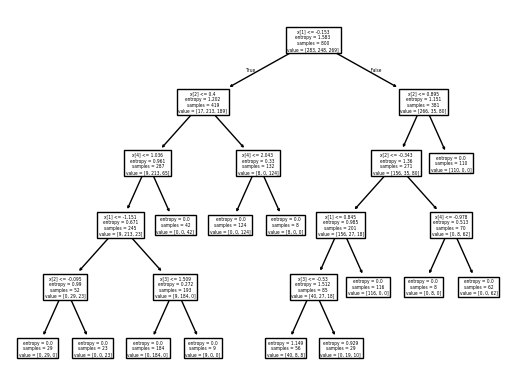

In [123]:
tree.plot_tree(model.fit(X_train, y_train)) 

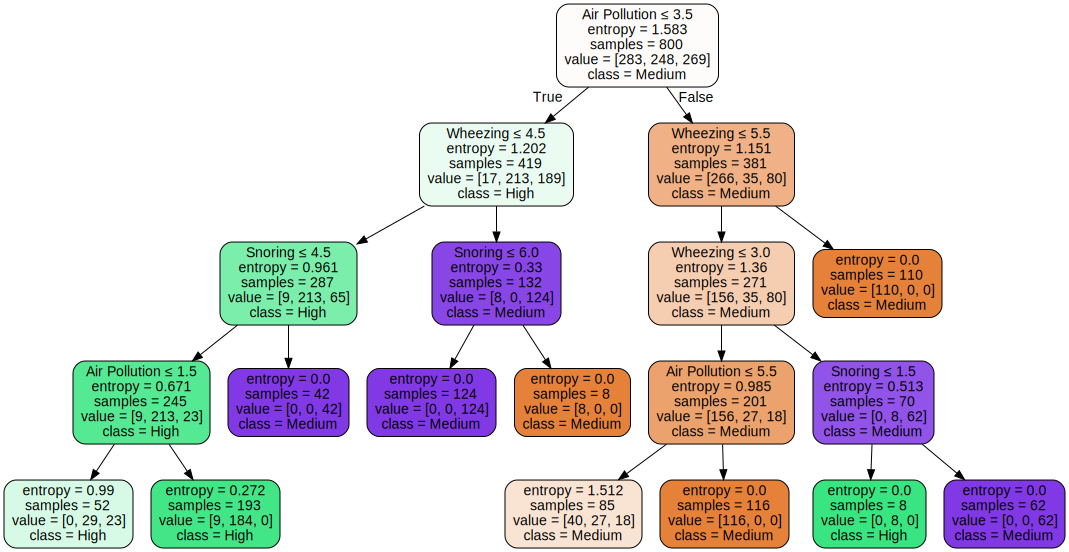

In [124]:
dot_data = tree.export_graphviz(model1, out_file=None, 
                              feature_names=X_train1.columns,  
                              class_names=y_train1,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

In [132]:
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(criterion='entropy')  
dt.fit(X_train, y_train)  

pred = dt.predict(X_test1) 
train_accuracy = dt.score(X_train1, y_train1) 
test_accuracy = accuracy_score(y_test1, pred)  

print("Decision Tree without Pruning ")
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Testing Accuracy: {test_accuracy * 100:.2f}%')

Decision Tree without Pruning 
Training Accuracy: 35.38%
Testing Accuracy: 41.00%


C:\Users\mujta\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\mujta\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


# Task 4

In [152]:
df2 = pd.read_csv("Data (1).csv")

In [153]:
df2.head()

,Entity,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Date,Daily tests,Cases,Deaths
0,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-25,8.0,NaN,NaN
1,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-26,5.0,NaN,NaN
2,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-27,4.0,NaN,NaN
3,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-28,1.0,NaN,NaN
4,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-29,8.0,NaN,NaN


In [154]:
df2.columns

Index(['Entity', 'Continent', 'Latitude', 'Longitude',
       'Average temperature per year', 'Hospital beds per 1000 people',
       'Medical doctors per 1000 people', 'GDP/Capita', 'Population',
       'Median age', 'Population aged 65 and over (%)', 'Date', 'Daily tests',
       'Cases', 'Deaths'],
      dtype='object')

In [155]:
df2.isnull().sum()

Entity                                0
Continent                             0
Latitude                              0
Longitude                             0
Average temperature per year          0
Hospital beds per 1000 people         0
Medical doctors per 1000 people       0
GDP/Capita                            0
Population                            0
Median age                            0
Population aged 65 and over (%)       0
Date                                  0
Daily tests                        7895
Cases                               254
Deaths                             3610
dtype: int64

In [156]:
df2.head()

,Entity,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Date,Daily tests,Cases,Deaths
0,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-25,8.0,NaN,NaN
1,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-26,5.0,NaN,NaN
2,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-27,4.0,NaN,NaN
3,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-28,1.0,NaN,NaN
4,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-29,8.0,NaN,NaN


In [161]:
import matplotlib.pyplot as plt

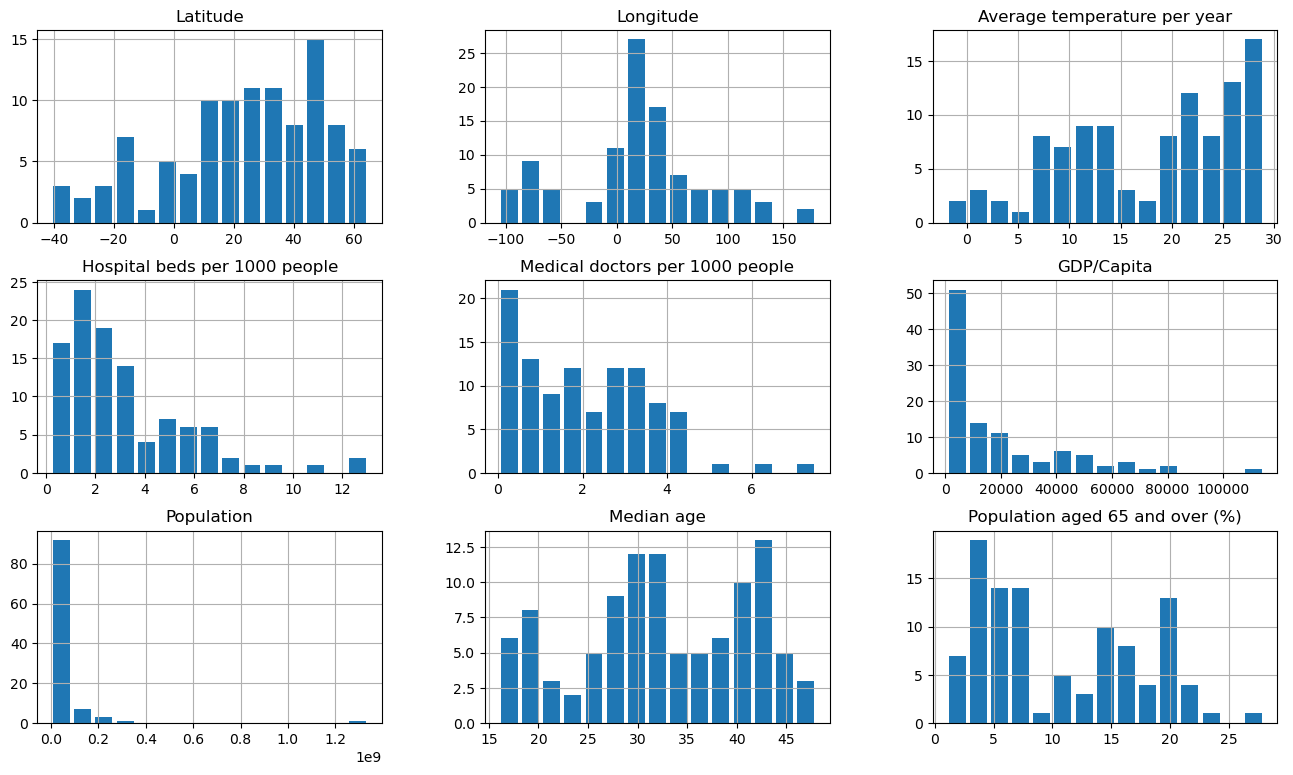

In [162]:
columns = ['Date', 'Daily tests', 'Cases', 'Deaths']
df2.drop(columns, axis=1).drop_duplicates().hist(bins=15, figsize=(16, 9), rwidth=0.8)
plt.show()

C:\Users\mujta\AppData\Local\Temp\ipykernel_15504\3172257013.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_last.corr(), annot=True, cmap=plt.cm.Reds)


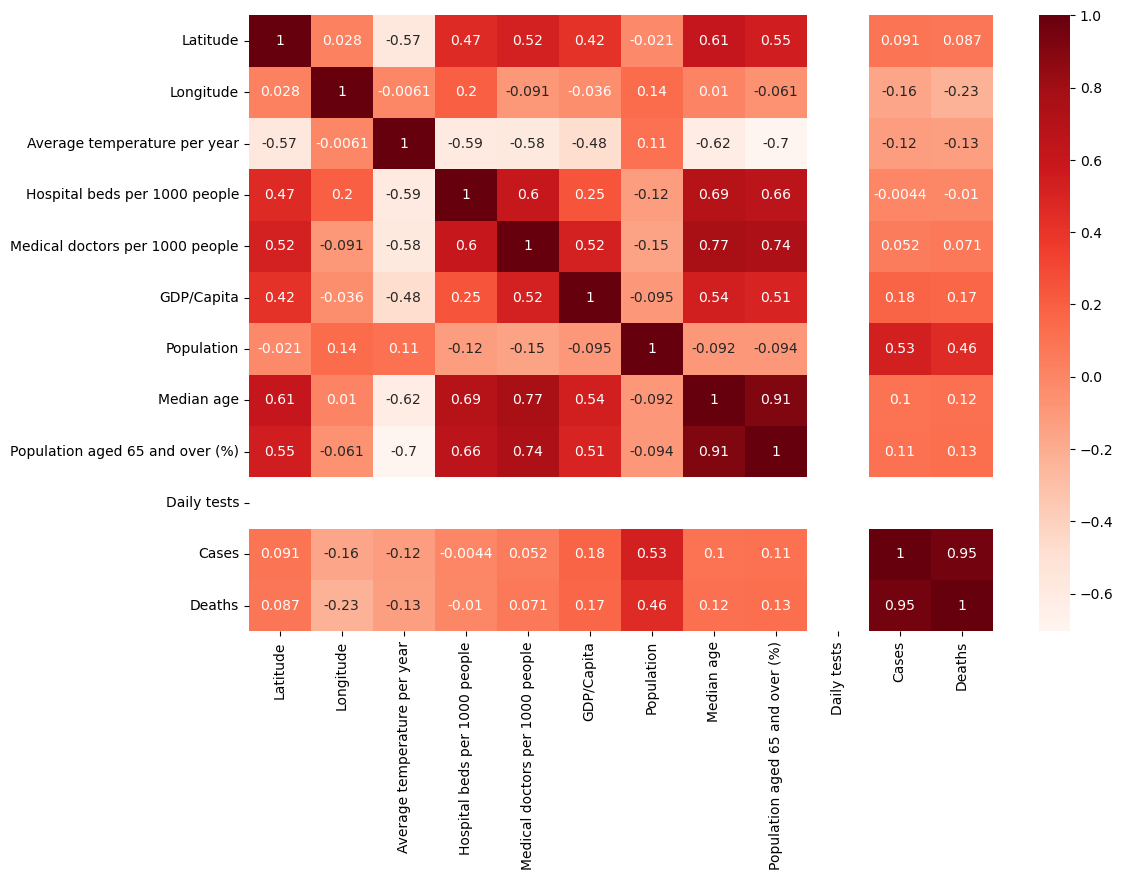

In [163]:
df_last = df2.groupby('Entity').tail(1).drop(['Entity', 'Date'], axis=1)
plt.figure(figsize=(12, 8))
sns.heatmap(df_last.corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

# Task 5

Find out the root node of the decision tree from scratch on the below dataset (Student,
Prior_Experience, Course, Time) using the CART algorithm. You can create this dataset in an
Excelfile.

In [197]:
df3.to_csv("student_data.csv")

In [204]:
df3=df3.drop('Student', axis=1)

In [205]:
df3

,Prior_Experience,Course,Time,Liked
0,Yes,Programming,Day,Yes
1,No,Programming,Day,No
2,Yes,History,Night,No
3,No,Programming,Night,Yes
4,Yes,English,Day,Yes
5,No,Programming,Day,No
6,Yes,Programming,Day,No
7,Yes,Mathematics,Night,Yes
8,Yes,Programming,Night,Yes
9,Yes,Programming,Night,No


In [206]:
from sklearn.preprocessing import OrdinalEncoder

In [207]:
columns = ['Prior_Experience', 'Course', 'Time']

In [208]:
oe = OrdinalEncoder()
df3[columns] = oe.fit_transform(df3[columns])

In [209]:
df3

,Prior_Experience,Course,Time,Liked
0,1.0,3.0,0.0,Yes
1,0.0,3.0,0.0,No
2,1.0,1.0,1.0,No
3,0.0,3.0,1.0,Yes
4,1.0,0.0,0.0,Yes
5,0.0,3.0,0.0,No
6,1.0,3.0,0.0,No
7,1.0,2.0,1.0,Yes
8,1.0,3.0,1.0,Yes
9,1.0,3.0,1.0,No


In [246]:
X1 = df3.drop(['Liked'], axis=1)

y1 = df3['Liked']

In [247]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X1, y1, test_size = 0.2, random_state = 0)

In [248]:
model3 = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)

model3.fit(X_train2, y_train2)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [249]:
y_pred = model3.predict(X_test2)

In [250]:
y_pred_train = model3.predict(X_train2)

y_pred_train

array(['Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No'], dtype=object)

[Text(0.375, 0.875, 'x[1] <= 2.5\ngini = 0.5\nsamples = 8\nvalue = [4, 4]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.3125, 0.75, 'True  '),
 Text(0.5, 0.625, 'x[2] <= 0.5\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.4375, 0.75, '  False'),
 Text(0.25, 0.375, 'x[0] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.375, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.75, 0.375, 'x[0] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

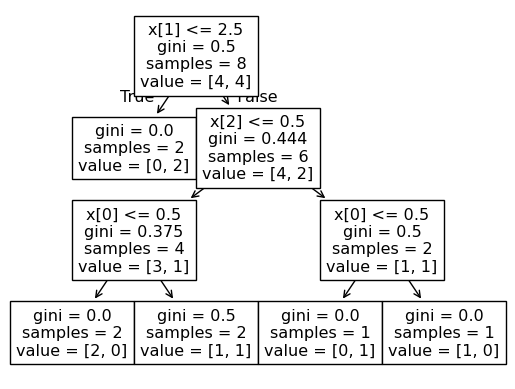

In [251]:
tree.plot_tree(model3.fit(X_train2, y_train2)) 

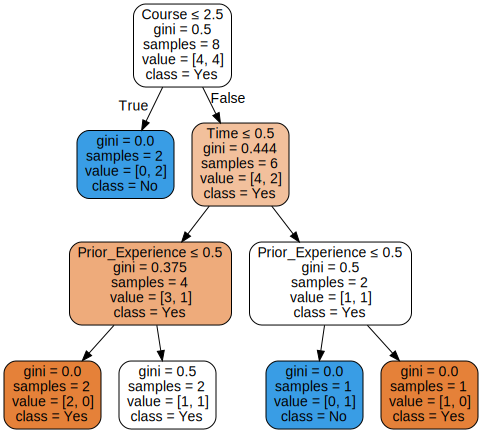

In [252]:
dot_data = tree.export_graphviz(model3, out_file=None, 
                              feature_names=X_train2.columns,  
                              class_names=y_train2,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 